<div style="text-align: center;">
    <h1 style= "font-size: 30px; style: bold; color: purple">
        Importing libraries
    </h1>
</div>

In [3]:
import pandas as pd 
import numpy as np  
import scipy         
import matplotlib.pyplot as plt  
import seaborn as sns         
from io import StringIO         
from bio_functions import differential_expression, significative_genes
from sklearn.decomposition import PCA          
from sklearn.preprocessing import StandardScaler

# Suppress runtime warnings to keep output clean
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

<div style="text-align: center;">
    <h1 style= "font-size: 30px; style: bold; color: purple">
        OSCC (control vs treated)
    </h1>
</div>

## Reading DataSet (OSCC control vs treated).

In [6]:
file_path ='./DataSets/GDS5625_full.soft'

with open(file_path, 'r', encoding='utf-8') as f:
    lines = f.readlines()
    
# Extracting DataFrame from file:
# Find the line index where the data table begins
start = next(i for i, l in enumerate(lines) if '!dataset_table_begin' in l)
# Find the line index where the data table ends
end = next(i for i, l in enumerate(lines) if '!dataset_table_end' in l)
table_lines = ''.join(lines[start+1:end])

df = pd.read_csv(StringIO(table_lines), sep='\t')
df.head()

,ID_REF,IDENTIFIER,GSM950307,GSM950308,GSM950305,GSM950306,GSM950311,GSM950312,GSM950309,GSM950310,...,Platform_SPOTID,Chromosome location,Chromosome annotation,GO:Function,GO:Process,GO:Component,GO:Function ID,GO:Process ID,GO:Component ID,Platform_SEQUENCE
0,ILMN_1722532,KDM3A,315.1700,329.2500,293.3350,294.5950,643.9510,629.7350,533.4860,521.9340,...,NaN,2p11.2,"Chromosome 2, NC_000002.12 (86440647..86492716)",androgen receptor binding///core promoter bind...,androgen receptor signaling pathway///formalde...,cytoplasm///membrane///nucleoplasm///nucleopla...,GO:0050681///GO:0001047///GO:0051213///GO:0032...,GO:0030521///GO:0046293///GO:0033169///GO:0036...,GO:0005737///GO:0016020///GO:0005654///GO:0005...,CCAGGCTGTAAAAGCAAAACCTCGTATCAGCTCTGGAACAATACCT...
1,ILMN_1708805,NCOA3,1562.2200,1534.8000,1709.2200,1692.2400,702.2120,726.6540,653.7710,842.0920,...,NaN,20q12,"Chromosome 20, NC_000020.11 (47501857..47656877)",androgen receptor binding///histone acetyltran...,androgen receptor signaling pathway///cellular...,cytoplasm///extracellular exosome///nuclear ch...,GO:0050681///GO:0004402///GO:0016922///GO:0030...,GO:0030521///GO:0071392///GO:0016573///GO:0030...,GO:0005737///GO:0070062///GO:0000790///GO:0005...,CCACATGAAATGACTTATGGGGGATGGTGAGCTGTGACTGCTTTGC...
2,ILMN_1672526,LOC389834,62.4703,60.4344,54.1229,52.5219,60.1145,50.3953,54.5167,48.7994,...,NaN,NaN,Chromosome Un,NaN,NaN,NaN,NaN,NaN,NaN,CCATTGGTTCTGTTTGGCATAACCCTATTAAATGGTGCGCAGAGCT...
3,ILMN_1703284,SPIRE2,132.9330,154.4320,160.4410,166.5520,122.3620,120.1510,143.1250,145.6230,...,NaN,16q24,"Chromosome 16, NC_000016.10 (89817477..89871319)",actin binding,actin cytoskeleton organization///actin nuclea...,cell cortex///colocalizes_with cleavage furrow...,GO:0003779,GO:0030036///GO:0045010///GO:0036089///GO:0051...,GO:0005938///colocalizes_with GO:0032154///GO:...,ACATGTGTCCTGCCTCTCCTGGCCCTACCACATTCTGGTGCTGTCC...
4,ILMN_2185604,C17orf77,41.3366,48.8084,42.9886,43.3352,46.3833,46.2798,50.6068,44.7490,...,NaN,17q25.1,"Chromosome 17, NC_000017.11 (74584679..74594209)",NaN,NaN,extracellular region,NaN,NaN,GO:0005576,CTGCTCCAGTGAAGGGTGCACCAAAATCTCAGAAGTCACTGCTAAA...


## Exploring and preparing Data

### Checking columns and types

In [9]:
# Check dataframe columns
df.columns

Index(['ID_REF', 'IDENTIFIER', 'GSM950307', 'GSM950308', 'GSM950305',
       'GSM950306', 'GSM950311', 'GSM950312', 'GSM950309', 'GSM950310',
       'GSM950315', 'GSM950316', 'GSM950313', 'GSM950314', 'GSM950319',
       'GSM950320', 'GSM950317', 'GSM950318', 'Gene title', 'Gene symbol',
       'Gene ID', 'UniGene title', 'UniGene symbol', 'UniGene ID',
       'Nucleotide Title', 'GI', 'GenBank Accession', 'Platform_CLONEID',
       'Platform_ORF', 'Platform_SPOTID', 'Chromosome location',
       'Chromosome annotation', 'GO:Function', 'GO:Process', 'GO:Component',
       'GO:Function ID', 'GO:Process ID', 'GO:Component ID',
       'Platform_SEQUENCE'],
      dtype='object')

In [10]:
# Display concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24526 entries, 0 to 24525
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID_REF                 24526 non-null  object 
 1   IDENTIFIER             24526 non-null  object 
 2   GSM950307              24526 non-null  float64
 3   GSM950308              24526 non-null  float64
 4   GSM950305              24526 non-null  float64
 5   GSM950306              24526 non-null  float64
 6   GSM950311              24526 non-null  float64
 7   GSM950312              24526 non-null  float64
 8   GSM950309              24526 non-null  float64
 9   GSM950310              24526 non-null  float64
 10  GSM950315              24526 non-null  float64
 11  GSM950316              24526 non-null  float64
 12  GSM950313              24526 non-null  float64
 13  GSM950314              24526 non-null  float64
 14  GSM950319              24526 non-null  float64
 15  GS

### Checking for gene duplicates

In [12]:
print(df['IDENTIFIER'].value_counts())

IDENTIFIER
PLEC            8
DMD             8
BDNF            7
TCF7            6
ACOT7           6
               ..
MOS             1
GHRHR           1
KLK13           1
ILMN_2407235    1
KRTAP19-1       1
Name: count, Length: 19335, dtype: int64


### Defining expression DataFrame (expr_df)

In [14]:
# Selecting columns relevant for differential expression analysis
expr_df = df[['IDENTIFIER', 'GSM950307', 'GSM950308', 'GSM950305',
       'GSM950306', 'GSM950311', 'GSM950312', 'GSM950309', 'GSM950310',
       'GSM950315', 'GSM950316', 'GSM950313', 'GSM950314', 'GSM950319',
       'GSM950320', 'GSM950317', 'GSM950318']]
    

expr_df.set_index('IDENTIFIER', inplace=True)
expr_df.head()

,GSM950307,GSM950308,GSM950305,GSM950306,GSM950311,GSM950312,GSM950309,GSM950310,GSM950315,GSM950316,GSM950313,GSM950314,GSM950319,GSM950320,GSM950317,GSM950318
IDENTIFIER,,,,,,,,,,,,,,,,
KDM3A,315.1700,329.2500,293.3350,294.5950,643.9510,629.7350,533.4860,521.9340,541.4220,478.8540,437.7600,503.7200,300.3830,304.3390,327.2360,339.6670
NCOA3,1562.2200,1534.8000,1709.2200,1692.2400,702.2120,726.6540,653.7710,842.0920,1157.9200,940.3050,1012.6600,992.6530,853.1850,856.6820,1500.1700,1534.8000
LOC389834,62.4703,60.4344,54.1229,52.5219,60.1145,50.3953,54.5167,48.7994,50.1333,52.5094,52.2841,52.6763,62.3005,65.0340,63.2883,67.0911
SPIRE2,132.9330,154.4320,160.4410,166.5520,122.3620,120.1510,143.1250,145.6230,291.8820,283.5950,288.3980,268.0480,86.0440,89.4151,85.7159,91.7609
C17orf77,41.3366,48.8084,42.9886,43.3352,46.3833,46.2798,50.6068,44.7490,46.8960,45.1536,48.1011,46.5660,45.1352,45.8194,45.4781,43.0139


### Collapsing probes to genes (mean expression)

In [16]:
columns_before = expr_df.shape[0]
    
expr_df = expr_df.groupby('IDENTIFIER').mean()

columns_after = expr_df.shape[0]

print(f'Number of rows of expr_df before collapse: {columns_before}')
print(f'Number of rows of expr_df after collapse: {columns_after}')
print(f'{columns_before - columns_after} columns removed')

Number of rows of expr_df before collapse: 24526
Number of rows of expr_df after collapse: 19335
5191 columns removed


### Transposing DataFrame

In [18]:
expr_df = expr_df.transpose()
expr_df.head()

IDENTIFIER,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
GSM950307,64.1488,50.902500,42.1111,45.8194,49.1223,230.1140,63.7330,143.964,390.478,60.8150,...,126.95605,82.5178,66.68485,84.4858,120.25725,59.5102,743.972,1428.6210,379.088,724.617
GSM950308,66.9467,56.148600,43.6054,46.6150,54.4537,247.6490,70.5925,144.613,377.039,57.6222,...,138.32300,86.5415,62.79900,92.1646,117.16265,58.8362,753.945,1657.3940,325.850,721.794
GSM950305,62.3179,54.732200,48.9143,47.8481,44.0954,92.1953,69.1586,183.994,357.650,54.9111,...,89.00525,95.0114,79.44780,119.9500,129.35160,49.7148,828.385,1967.1765,321.806,975.516
GSM950306,63.0623,54.597433,46.6947,48.7473,49.8344,83.7377,82.5297,166.686,333.450,60.3646,...,91.36625,85.9033,75.95020,114.9770,126.66360,49.4590,863.976,2029.0575,316.361,1019.670
GSM950311,65.0819,53.680900,58.6665,54.7917,57.0311,129.1650,68.0825,190.137,343.431,796.5490,...,237.32500,284.3355,77.62505,116.7470,117.21095,49.3781,1089.400,1237.4915,241.741,883.349


### The Data is already normalized

### Adding 'Treatment' column

In [21]:
sample_to_label = {}

current_label = None
for line in lines:
    # Check if the line defines a subset description (treatment label)
    if line.startswith('!subset_description'):
        current_label = line.split('=')[1].strip()
    # Check if the line defines sample IDs for the current treatment
    elif line.startswith('!subset_sample_id') and current_label:
        # Extract and split the sample IDs
        samples = line.split('=')[1].strip().split(',')
        # Associate each sample ID with the current treatment label
        for s in samples:
            sample_to_label[s.strip()] = current_label

# Add a new 'Treatment' column to the expression dataframe
# by mapping each sample ID (index) to its corresponding treatment label
expr_df['Treatment'] = expr_df.index.map(sample_to_label)

expr_df.head()

IDENTIFIER,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,Treatment
GSM950307,64.1488,50.902500,42.1111,45.8194,49.1223,230.1140,63.7330,143.964,390.478,60.8150,...,82.5178,66.68485,84.4858,120.25725,59.5102,743.972,1428.6210,379.088,724.617,5-aza-2’-deoxycytidine
GSM950308,66.9467,56.148600,43.6054,46.6150,54.4537,247.6490,70.5925,144.613,377.039,57.6222,...,86.5415,62.79900,92.1646,117.16265,58.8362,753.945,1657.3940,325.850,721.794,5-aza-2’-deoxycytidine
GSM950305,62.3179,54.732200,48.9143,47.8481,44.0954,92.1953,69.1586,183.994,357.650,54.9111,...,95.0114,79.44780,119.9500,129.35160,49.7148,828.385,1967.1765,321.806,975.516,control
GSM950306,63.0623,54.597433,46.6947,48.7473,49.8344,83.7377,82.5297,166.686,333.450,60.3646,...,85.9033,75.95020,114.9770,126.66360,49.4590,863.976,2029.0575,316.361,1019.670,control
GSM950311,65.0819,53.680900,58.6665,54.7917,57.0311,129.1650,68.0825,190.137,343.431,796.5490,...,284.3355,77.62505,116.7470,117.21095,49.3781,1089.400,1237.4915,241.741,883.349,5-aza-2’-deoxycytidine


### Adding 'Cell_type' column

In [23]:
# - oc3: Oral cancer cell line 3
# - sas: SAS cell line (oral squamous cell carcinoma)
# - scc15: Squamous cell carcinoma 15 cell line
# - hsc3: Human squamous carcinoma cell line 3
cell_map = {
    'GSM950305':'oc3',
    'GSM950306':'oc3',
    'GSM950307':'oc3',
    'GSM950308':'oc3',
    'GSM950309':'sas',
    'GSM950310':'sas',
    'GSM950311':'sas',
    'GSM950312':'sas',
    'GSM950313':'scc15',
    'GSM950314':'scc15',
    'GSM950315':'scc15',
    'GSM950316':'scc15',
    'GSM950317':'hsc3',
    'GSM950318':'hsc3',
    'GSM950319':'hsc3',
    'GSM950320':'hsc3',
}

expr_df['Cell_type'] = expr_df.index.map(cell_map)

expr_df.head()

IDENTIFIER,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,Treatment,Cell_type
GSM950307,64.1488,50.902500,42.1111,45.8194,49.1223,230.1140,63.7330,143.964,390.478,60.8150,...,66.68485,84.4858,120.25725,59.5102,743.972,1428.6210,379.088,724.617,5-aza-2’-deoxycytidine,oc3
GSM950308,66.9467,56.148600,43.6054,46.6150,54.4537,247.6490,70.5925,144.613,377.039,57.6222,...,62.79900,92.1646,117.16265,58.8362,753.945,1657.3940,325.850,721.794,5-aza-2’-deoxycytidine,oc3
GSM950305,62.3179,54.732200,48.9143,47.8481,44.0954,92.1953,69.1586,183.994,357.650,54.9111,...,79.44780,119.9500,129.35160,49.7148,828.385,1967.1765,321.806,975.516,control,oc3
GSM950306,63.0623,54.597433,46.6947,48.7473,49.8344,83.7377,82.5297,166.686,333.450,60.3646,...,75.95020,114.9770,126.66360,49.4590,863.976,2029.0575,316.361,1019.670,control,oc3
GSM950311,65.0819,53.680900,58.6665,54.7917,57.0311,129.1650,68.0825,190.137,343.431,796.5490,...,77.62505,116.7470,117.21095,49.3781,1089.400,1237.4915,241.741,883.349,5-aza-2’-deoxycytidine,sas


## Analyzing effect of 5-aza-2’-deoxycytidine on OSCC cell subtypes (control vs treated)

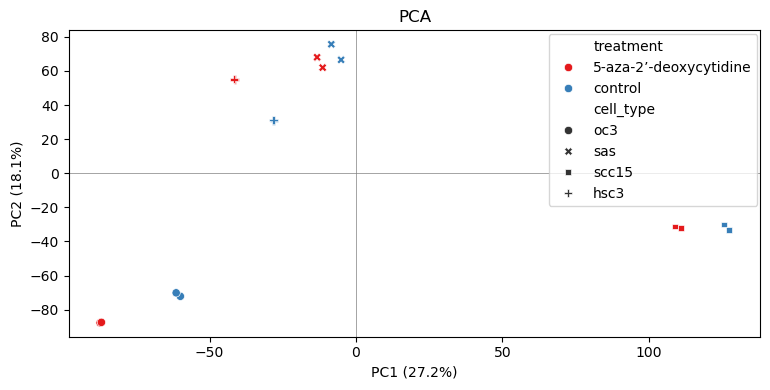

In [31]:
# Principal Component Analysis (PCA) for dimensionality reduction and visualization

# Extract only expression data by removing metadata columns
expr_data = expr_df.drop(['Cell_type', 'Treatment'], axis=1)

X = expr_data.values
y = expr_df['Treatment'].values

# Standardize the data (mean=0, variance=1) - important for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensions to 2 components for visualization
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_scaled)  # Transform the scaled data to the PCA space

# Create a DataFrame with PCA results and metadata for easier plotting
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['cell_type'] = expr_df['Cell_type'].values  
df_pca['treatment'] = y


plt.figure(figsize=(8,4)) 
# Plot points colored by treatment and with different markers for cell types
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='treatment', style='cell_type', palette='Set1')
plt.title('PCA')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.axhline(0, color='grey', linewidth=0.5)
plt.axvline(0, color='grey', linewidth=0.5)
plt.legend(
    loc='upper left',
    bbox_to_anchor=(0.684, 1.01),
    frameon=True
    )
plt.tight_layout() 
plt.show() 

Insights from the PCA plot:
- Replicates cluster well together, indicating good reproducibility.
- Cell type is the dominant factor in gene expression variation (EDA should be performed separately for each cell type). 
- The effect of 5-aza-2'-deoxycytidine appears to be cell-type specific, with a stronger effect in OC3 and a weaker effect in SAS.

### Determining differential gene expression parameters

In [33]:
subtypes = ['oc3', 'sas', 'scc15', 'hsc3']

# Define significance thresholds for differential expression analysis
crit_pval = 0.05        
crit_log2FC = 0.5 


diffExprDict = {}

for subtype in subtypes:
    control_group = expr_df[
        (expr_df['Cell_type'] == subtype) & 
        (expr_df['Treatment'] == 'control')
    ].index.tolist()
    
    treated_group = expr_df[
        (expr_df['Cell_type'] == subtype) & 
        (expr_df['Treatment'] == "5-aza-2’-deoxycytidine")
    ].index.tolist()
    
    # Perform differential expression analysis between control and treated groups
    results = differential_expression(expr_data, control_group, treated_group)
    
    # Classify genes based on significance and fold change direction
    results['significance'] = 'non-significant'
    results.loc[(results['pval'] < crit_pval) & (results['log2FC'] > crit_log2FC), 'significance'] = 'Upregulated'
    results.loc[(results['pval'] < crit_pval) & (results['log2FC'] < - crit_log2FC), 'significance'] = 'Downregulated'
    
    # Calculate -log10(p-value) for volcano plot visualization
    results['-log10(pval)'] = -np.log10(results['pval'])

    # Store results for this subtype in the dictionary
    diffExprDict[subtype] = results

### Filtering significant genes

In [35]:
signifGeneDict = {}

for subtype in subtypes:
    diffExprDF = diffExprDict[subtype]
    
    # Filter genes that meet significance criteria:
    significant_genes = diffExprDF[(diffExprDF['pval'] < crit_pval) & (abs(diffExprDF['log2FC']) > crit_log2FC)]
    
    signifGeneDict[subtype] = significant_genes

### Searching for common significant genes

In [37]:
# Create a list of all gene indices from each dataframe in signifGeneDict
index_lists = [dataframe.index for dataframe in signifGeneDict.values()]

# Find genes that are common across all subtypes:
common_genes = set.intersection(*map(set, index_lists))
# Convert the resulting set back to a list for easier handling
common_genes = list(common_genes)

print(f'There are {len(common_genes)} genes differentially expressed in every OSCC subtype: ')
print(f'{'\n'.join(common_genes)}')

There are 8 genes differentially expressed in every OSCC subtype: 
MAGEC2
SPRR2D
CCL20
TKTL1
PLIN2
IGFBP3
SPANXD
DAZL


### Plots

C:\Users\aacti\AppData\Local\Temp\ipykernel_21588\2946523183.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heatmap_df = heatmap_df.fillna(0)


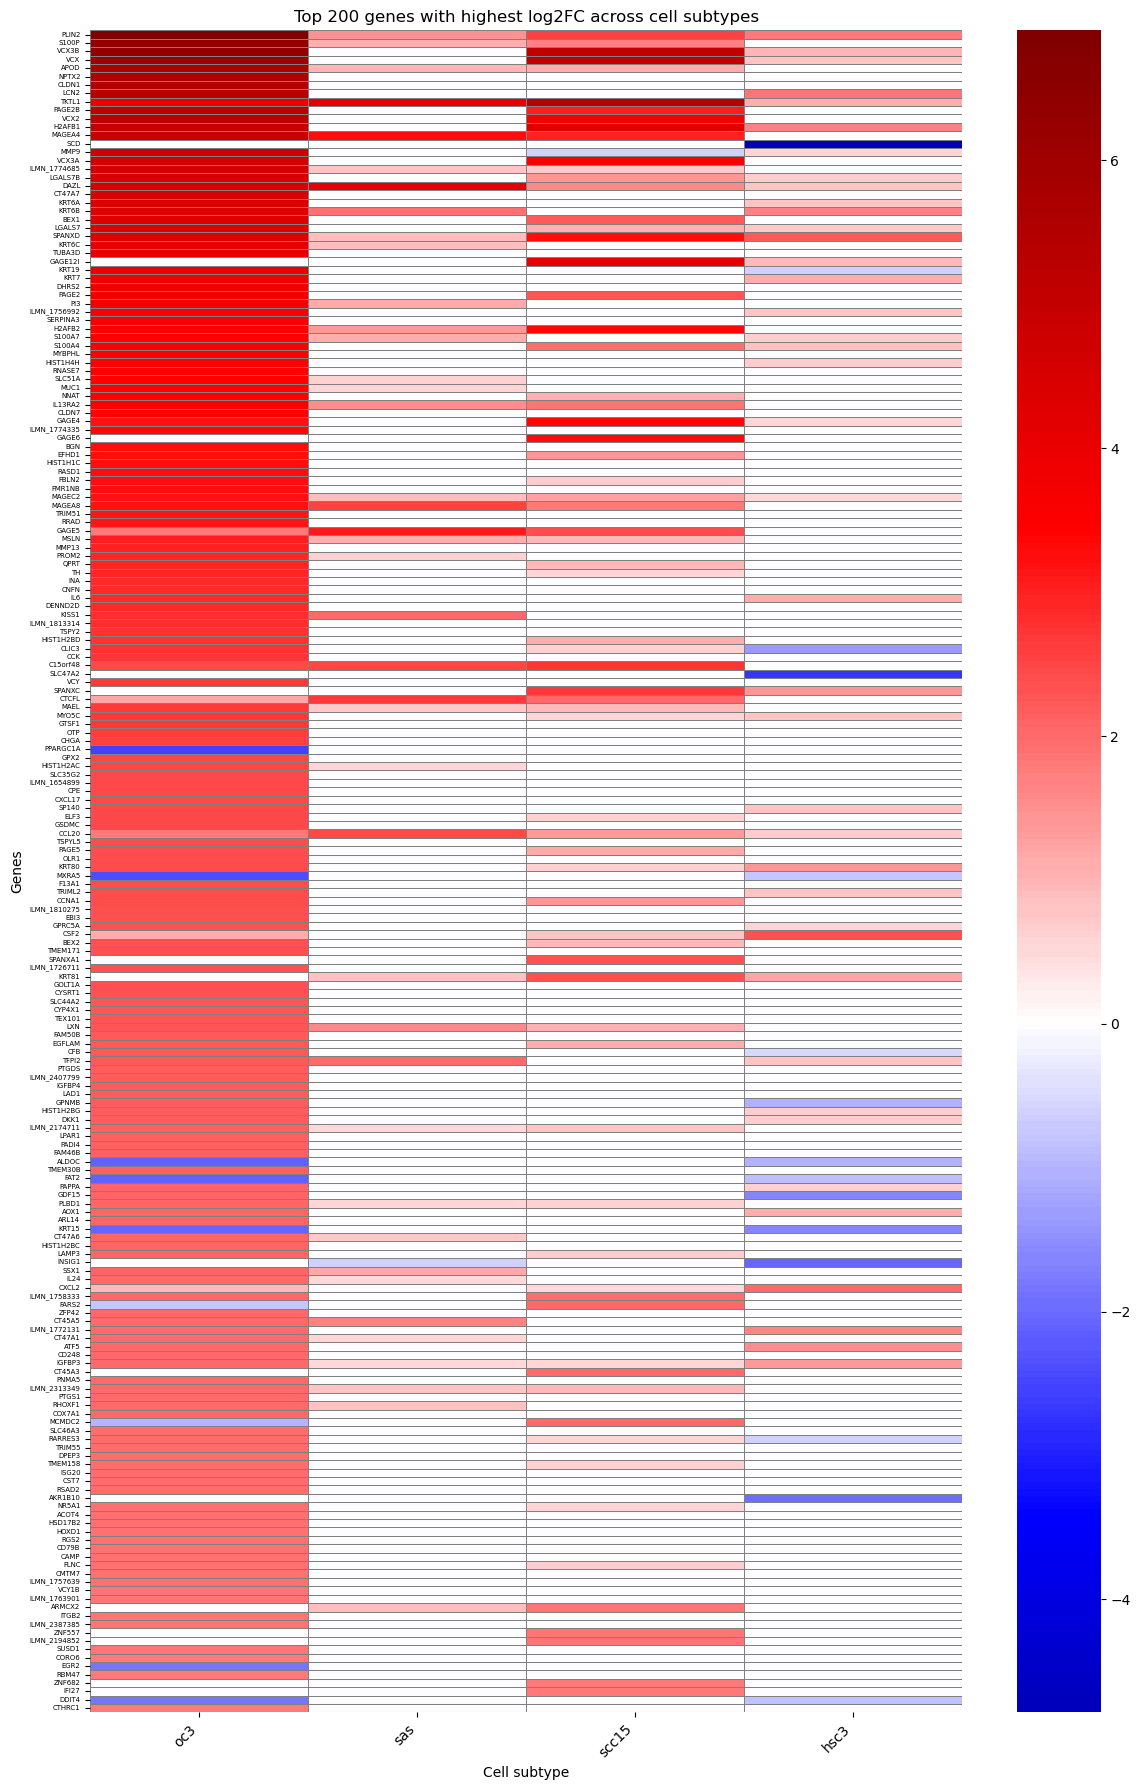

In [39]:
# Create a DataFrame with all genes in signifGeneDict and their log2FC values
all_genes = set()
for df in signifGeneDict.values():
    all_genes.update(df.index)

all_genes = sorted(all_genes) 
heatmap_df = pd.DataFrame(index=all_genes, columns=signifGeneDict.keys())  # Create empty DataFrame

for subtype, df in signifGeneDict.items():
    heatmap_df.loc[df.index, subtype] = df['log2FC']

# Fill NaN values with 0 (genes not DE in that subtype)
heatmap_df = heatmap_df.fillna(0)

# Calculate the magnitude of log2FC for each gene (using the maximum absolute value across subtypes)
heatmap_df['max_abs_log2FC'] = heatmap_df.abs().max(axis=1)

# Select the top 200 genes with highest log2FC magnitude
top_200_genes = heatmap_df.nlargest(200, 'max_abs_log2FC').index
top_200_df = heatmap_df.loc[top_200_genes, signifGeneDict.keys()]  


plt.figure(figsize=(12, 18)) 
ax = sns.heatmap(
    top_200_df.astype(float), 
    cmap='seismic', 
    center=0,  
    linewidths=0.5,  
    linecolor='grey',
    yticklabels=True, 
    xticklabels=True   
)

ax.tick_params(axis='y', which='major', labelsize=5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  

plt.title("Top 200 genes with highest log2FC across cell subtypes")
plt.xlabel("Cell subtype")
plt.ylabel("Genes")
plt.tight_layout() 
plt.show() 

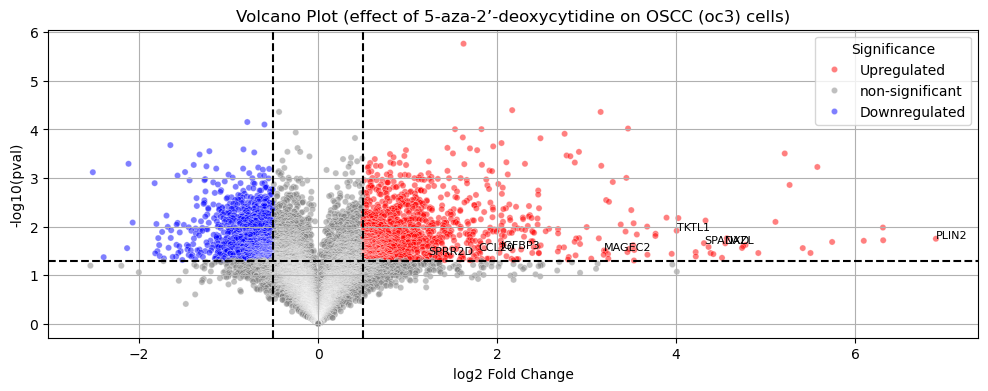

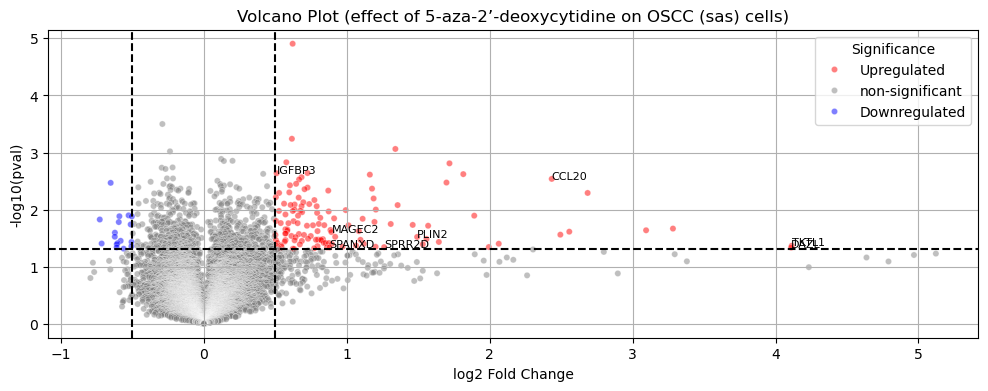

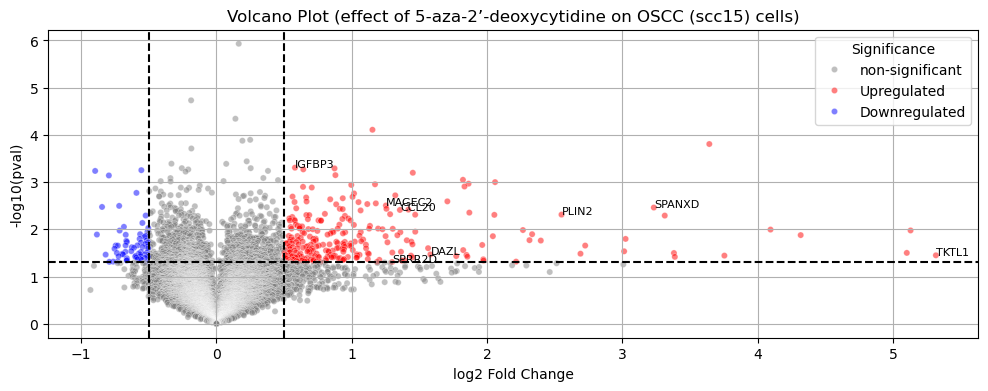

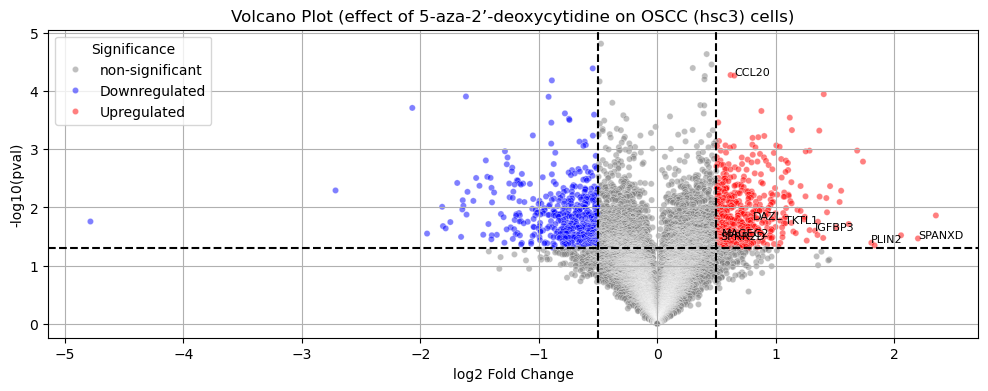

In [40]:
# Volcano plot - Visualizing differential expression results for each subtype

for subtype in subtypes:
    plt.figure(figsize=(12, 4))
    sns.scatterplot(
        data = diffExprDict[subtype],
        x='log2FC', 
        y='-log10(pval)', 
        hue='significance',
        palette={'non-significant': 'grey', 'Upregulated': 'red', 'Downregulated': 'blue'},
        alpha=0.5,  
        s=20        
    )
    
    # Add threshold lines to indicate significance cutoffs
    plt.axhline(-np.log10(crit_pval), color='black', linestyle='--') 
    plt.axvline(crit_log2FC, color='black', linestyle='--')           
    plt.axvline(-crit_log2FC, color='black', linestyle='--')         
    
    plt.title(f'Volcano Plot (effect of 5-aza-2’-deoxycytidine on OSCC ({subtype}) cells)')
    plt.xlabel('log2 Fold Change')
    plt.ylabel('-log10(pval)')
    plt.legend(title='Significance')
    plt.grid(True)
    
    # Label specific genes of interest (common_genes) on the plot
    for gene in common_genes:
        row = diffExprDict[subtype].loc[gene]
        plt.text(row['log2FC'], row['-log10(pval)'], gene, fontsize=8, color='black')
    
    plt.show()